# Project: Lung Cancer Classification

##### Mohamed Refaat - 211001955

## About the Dataset

Dataset Link: https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer

The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system
- Total number of attributes:16 
- total Number of rows:309

- **Gender**: M(male), F(female) 
- **Age**: Age of the patient 
- **Smoking**: YES=2 , NO=1. 
- **Yellow fingers**: YES=2 , NO=1. 
- **Anxiety**: YES=2 , NO=1. 
- **Peer_pressure**: YES=2 , NO=1. 
- **Chronic Disease**: YES=2 , NO=1. 
- **Fatigue**: YES=2 , NO=1. 
- **Allergy**: YES=2 , NO=1. 
- **Wheezing**: YES=2 , NO=1. 
- **Alcohol**: YES=2 , NO=1. 
- **Coughing**: YES=2 , NO=1. 
- **Shortness of Breath**: YES=2 , NO=1. 
- **Swallowing Difficulty**: YES=2 , NO=1. 
- **Chest pain**: YES=2 , NO=1. 
- **Lung Cancer**: YES , NO.(target)

In [1]:
# Disable Warnings
import warnings

def warning(*args, **kwargs):
    pass

warnings.warn = warning

## Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

## Loading the Dataset 

In [3]:
# Loading in the csv file as a pandas dataframe
df = pd.read_csv("./survey lung cancer.csv")

In [4]:
# Printing the first 5 rows of the dataset
df.head(7)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES


In [5]:
# Getting the original number of columns and rows
original_num_rows = df.shape[0]
original_num_columns = df.shape[1]
print("Number of rows in the dataset:", original_num_rows)
print("Number of columns in the dataset:", original_num_columns)

Number of rows in the dataset: 309
Number of columns in the dataset: 16


## Preparing the Dataset before training

In [6]:
#Checking for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
# Checking if there are any column non-numeric value in the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [8]:
# Converting the Gender and the lung_cancer columns to numeric values
df['GENDER'] = df['GENDER'].replace({'M' : 2, 'F' : 1})
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES' : 2, 'NO' : 1})

In [9]:
# Changing all the values in all columns from 1 to 0 and from 2 to 1 
for column in df.columns:
    df[column] = df[column].replace({1: 0, 2: 1})

# Now value 1 : Yes and 0 :No
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
5,0,75,0,1,0,0,1,1,1,1,0,1,1,0,0,1
6,1,52,1,0,0,0,0,1,0,1,1,1,1,0,1,1
7,0,51,1,1,1,1,0,1,1,0,0,0,1,1,0,1
8,0,68,1,0,1,0,0,1,0,0,0,0,0,0,0,0
9,1,53,1,1,1,1,1,0,1,0,1,0,0,1,1,1


In [10]:
# Describe the Dataset to getting statistics of the Dataset
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Remove the duplicate values in data set
#df.drop_duplicates(inplace=True)  
removed_dup_num_rows = df.shape[0]
print(original_num_rows - removed_dup_num_rows, "duplicate rows were dropped")

0 duplicate rows were dropped


In [12]:
# Reordering the indices after the data cleaning
df.index = np.arange(len(df))

## Making visualizations to getting insights about the Dataset

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


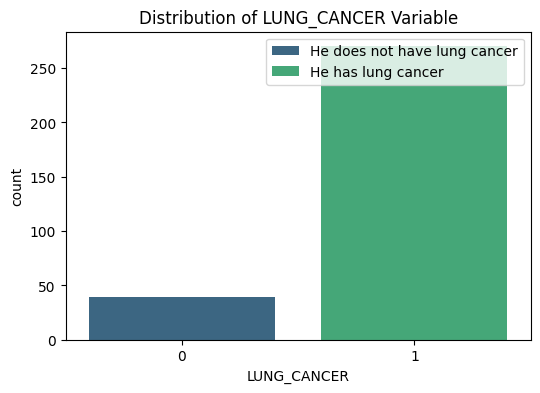

In [13]:
# Plotting how many people have lung cancer and how many do not
plt.figure(figsize=(6, 4))
sns.countplot(x='LUNG_CANCER', data=df, palette='viridis')
plt.title('Distribution of LUNG_CANCER Variable')
plt.legend()
plt.legend(['He does not have lung cancer', 'He has lung cancer'])
plt.show()

In [14]:
## Plotting how many people are smoking and how many do not
#plt.figure(figsize=(6, 4))  
#sns.countplot(x='SMOKING', data=df, palette='viridis')  
#plt.title('Distribution of SMOKING Variable')   
#plt.legend()
#plt.legend(['He does not smoke', 'He smokes'])
#plt.show()

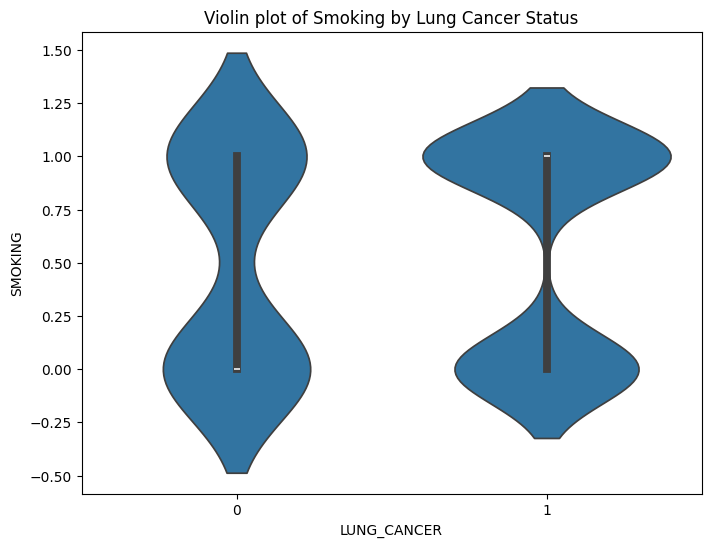

In [15]:
# Violin plot of smoking by lung cancer status
plt.figure(figsize=(8, 6))  
sns.violinplot(x='LUNG_CANCER', y='SMOKING', data=df)
plt.title('Violin plot of Smoking by Lung Cancer Status')
plt.show()

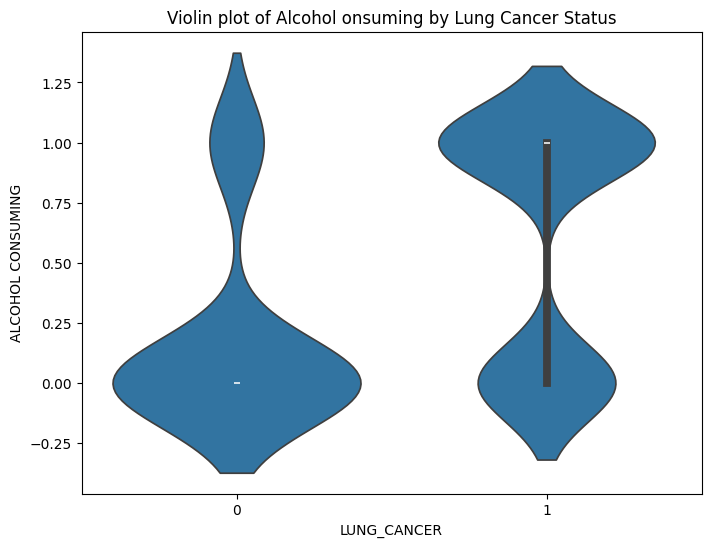

In [16]:
# Violin plot of alcohol consuming by lung cancer status
plt.figure(figsize=(8, 6))  
sns.violinplot(x='LUNG_CANCER', y='ALCOHOL CONSUMING', data=df)
plt.title('Violin plot of Alcohol onsuming by Lung Cancer Status')
plt.show()

## Feature Selection

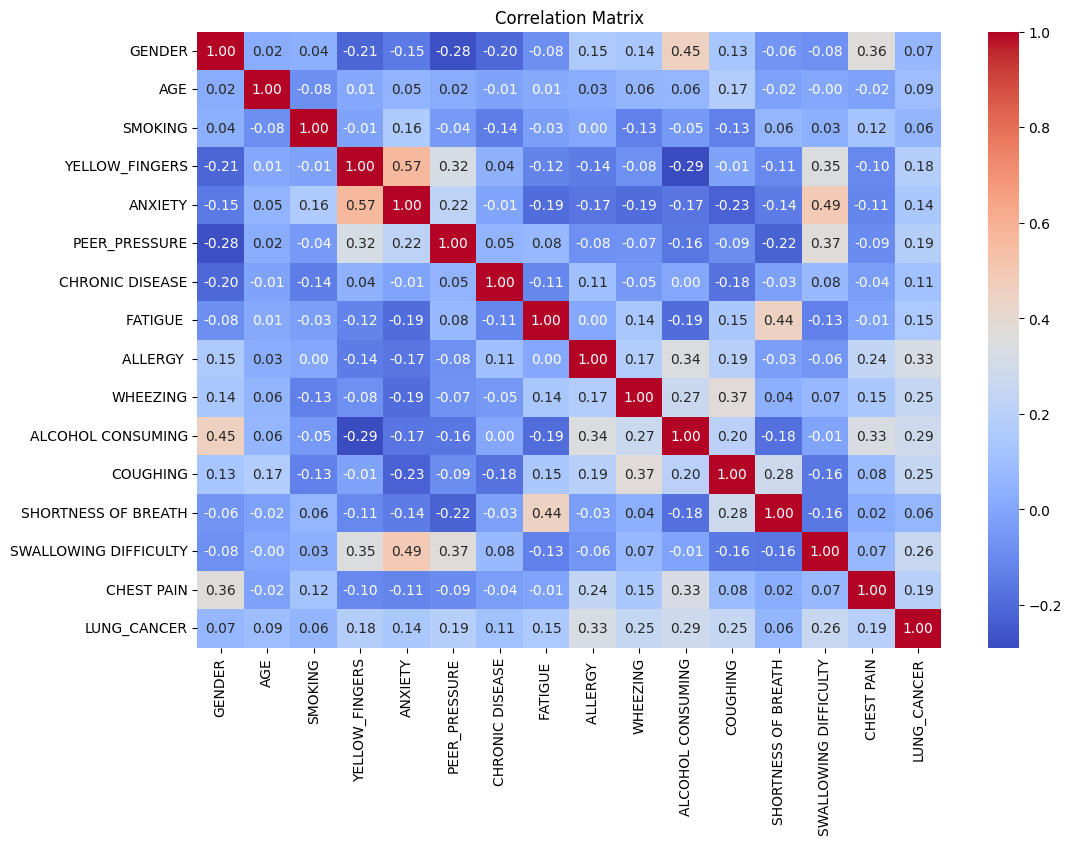

In [17]:
# Plotting correlation matrix(heatmap) to feature selection
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Separate features and lung_cancer variable
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Calculate the correlation between each feature and the lung_cancer variable
feature_lung_cancer_correlation = X.apply(lambda feature: feature.corr(y))

# Print the correlation values for debugging
print("Feature-Lung_Cancer Correlations:")
print(feature_lung_cancer_correlation)

Feature-Lung_Cancer Correlations:
GENDER                   0.067254
AGE                      0.089465
SMOKING                  0.058179
YELLOW_FINGERS           0.181339
ANXIETY                  0.144947
PEER_PRESSURE            0.186388
CHRONIC DISEASE          0.110891
FATIGUE                  0.150673
ALLERGY                  0.327766
WHEEZING                 0.249300
ALCOHOL CONSUMING        0.288533
COUGHING                 0.248570
SHORTNESS OF BREATH      0.060738
SWALLOWING DIFFICULTY    0.259730
CHEST PAIN               0.190451
dtype: float64


In [19]:
# Set a correlation threshold 
correlation_threshold = 0.18

# Select features that are highly correlated with the target variable
selected_features = feature_lung_cancer_correlation[abs(feature_lung_cancer_correlation) > correlation_threshold].index

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['YELLOW_FINGERS', 'PEER_PRESSURE', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')


In [20]:
# Printing the first 10 rows of the Dataset of the selected features
X_selected = X[selected_features]
X_selected.head(10)

,YELLOW_FINGERS,PEER_PRESSURE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,0,0,1,1,1,1,1
1,0,0,1,0,0,0,1,1
2,0,1,0,1,0,1,0,1
3,1,0,0,0,1,0,1,1
4,1,0,0,1,0,1,0,0
5,1,0,1,1,0,1,0,0
6,0,0,0,1,1,1,0,1
7,1,1,1,0,0,0,1,0
8,0,0,0,0,0,0,0,0
9,1,1,1,0,1,0,1,1


In [21]:
# Splitting the Dataset into 20% of the selected features to test and 80% to train
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

## Standardize features 

In [22]:
# Standardizing the Dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## GridSearch for Logistic Regression

In [23]:
# Define the parameter grid for the grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
}

# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Train the best model on the entire training set
best_estimator.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = best_estimator.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)

# Print the best parameters and results
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_logistic)
print("Classification Report:")
print(classification_report_logistic)

Best Parameters: {'C': 1, 'penalty': 'l2'}
Accuracy: 0.967741935483871
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



## Logistic Regression

In [24]:
# Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

logistic_regression.fit(X_train_scaled, y_train)

y_pred_logistic = logistic_regression.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

classification_report_logistic = classification_report(y_test, y_pred_logistic)

In [25]:
# Evaluate the Logistic Regression model
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_logistic:.4f}")
print("Classification Report:\n", classification_report_logistic)


Logistic Regression Results:
Accuracy: 0.9677
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      1.00      0.98        60

    accuracy                           0.97        62
   macro avg       0.48      0.50      0.49        62
weighted avg       0.94      0.97      0.95        62



In [26]:
#Calculating the confusion matrix for Logistic Regression
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix_logistic)

Confusion Matrix for Logistic Regression:
[[ 0  2]
 [ 0 60]]


## GridSearch for Decision Tree

In [27]:
# Define the parameter grid for the grid search
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Train the best model on the entire training set
best_estimator.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = best_estimator.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy_tree = accuracy_score(y_test, y_pred_tree)
classification_report_tree = classification_report(y_test, y_pred_tree)

# Print the best parameters and results
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_tree)
print("Classification Report:")
print(classification_report_tree)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.9032258064516129
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.50      0.25         2
           1       0.98      0.92      0.95        60

    accuracy                           0.90        62
   macro avg       0.57      0.71      0.60        62
weighted avg       0.96      0.90      0.93        62



## Decision Tree

In [28]:
# Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
classification_report_tree = classification_report(y_test, y_pred_tree)

In [29]:
# Evaluate the Decision Tree model
print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_tree:.4f}")
print("Classification Report:\n", classification_report_tree)


Decision Tree Results:
Accuracy: 0.9032
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.50      0.25         2
           1       0.98      0.92      0.95        60

    accuracy                           0.90        62
   macro avg       0.57      0.71      0.60        62
weighted avg       0.96      0.90      0.93        62



In [30]:
#Calculating the confusion matrix for Decision Tree
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix_tree)

Confusion Matrix for Decision Tree:
[[ 1  1]
 [ 5 55]]


## GridSearch for Random Forest

In [31]:
# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
random_forest = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(random_forest, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Train the best model on the entire training set
best_estimator.fit(X_train, y_train)

# Make predictions on the test set
y_pred_forest = best_estimator.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy_forest = accuracy_score(y_test, y_pred_forest)
classification_report_forest = classification_report(y_test, y_pred_forest)

# Print the best parameters and results
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_forest)
print("Classification Report:")
print(classification_report_forest)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9032258064516129
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.50      0.25         2
           1       0.98      0.92      0.95        60

    accuracy                           0.90        62
   macro avg       0.57      0.71      0.60        62
weighted avg       0.96      0.90      0.93        62



## Random Forest

In [32]:
# Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
classification_report_forest = classification_report(y_test, y_pred_forest)

In [33]:
# Evaluate the Random Forest model
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_forest:.4f}")
print("Classification Report:\n", classification_report_forest)


Random Forest Results:
Accuracy: 0.9677
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [34]:
#Calculating the confusion matrix for Random Forest
confusion_matrix_forest = confusion_matrix(y_test, y_pred_forest)
print("Confusion Matrix for Random Forest:")
print(confusion_matrix_forest)

Confusion Matrix for Random Forest:
[[ 1  1]
 [ 1 59]]


## GridSearch for SVM

In [35]:
# Define the parameter grid for the grid search
param_grid = {
    'C': [0.1, 1, 10],                 # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3, 4],               # Degree for the polynomial kernel (only for poly kernel)
}

# Create an SVM classifier
svm_classifier = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Train the best model on the entire training set
best_estimator.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = best_estimator.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

# Print the best parameters and results
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report_svm)

Best Parameters: {'C': 1, 'degree': 3, 'kernel': 'poly'}
Accuracy: 0.9032258064516129
Classification Report:
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         2
           1       1.00      0.90      0.95        60

    accuracy                           0.90        62
   macro avg       0.62      0.95      0.67        62
weighted avg       0.98      0.90      0.93        62



## SVM

In [36]:
# SVM model
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

In [37]:
# Evaluate the SVM model
print("\nSVM Results:")
print(f"Accuracy: {accuracy_svm:.4f}")
print("Classification Report:\n", classification_report_svm)


SVM Results:
Accuracy: 0.9194
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       0.98      0.93      0.96        60

    accuracy                           0.92        62
   macro avg       0.59      0.72      0.62        62
weighted avg       0.96      0.92      0.94        62



In [38]:
#Calculating the confusion matrix for SVM 
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM:")
print(confusion_matrix_svm)

Confusion Matrix for SVM:
[[ 1  1]
 [ 4 56]]


## GridSearch for KNN

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for the grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'p': [1, 2]  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Train the best model on the entire training set
best_estimator.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = best_estimator.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

# Print the best parameters and results
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_knn)
print("Classification Report:")
print(classification_report_knn)

Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.9193548387096774
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       0.98      0.93      0.96        60

    accuracy                           0.92        62
   macro avg       0.59      0.72      0.62        62
weighted avg       0.96      0.92      0.94        62



## KNN

In [40]:
# KNN model
knn = KNeighborsClassifier( n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

In [41]:
# Evaluate the KNN model
print("\nKNN Results:")
print(f"Accuracy: {accuracy_knn:.4f}")
print("Classification Report:\n", classification_report_knn)


KNN Results:
Accuracy: 0.9194
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       0.98      0.93      0.96        60

    accuracy                           0.92        62
   macro avg       0.59      0.72      0.62        62
weighted avg       0.96      0.92      0.94        62



In [42]:
#Calculating the confusion matrix for KNN 
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:")
print(confusion_matrix_knn)

Confusion Matrix for KNN:
[[ 1  1]
 [ 4 56]]


## Evaluate all Models 

In [43]:
# Evaluate the Logistic Regression model
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic:.4f}")


# Evaluate the Decision Tree model
print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_tree:.4f}")


# Evaluate the Random Forest model
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_forest:.4f}")


# Evaluate the SVM model
print("\nSVM Results:")
print(f"Accuracy: {accuracy_svm:.4f}")


# Evaluate the KNN model
print("\nKNN Results:")
print(f"Accuracy: {accuracy_knn:.4f}")

Logistic Regression Results:
Accuracy: 0.9677

Decision Tree Results:
Accuracy: 0.9032

Random Forest Results:
Accuracy: 0.9677

SVM Results:
Accuracy: 0.9194

KNN Results:
Accuracy: 0.9194
